In [ ]:
import pandas as pd
import pickle as pkl
from sklearn.metrics import recall_score 

In [ ]:
# You can add your dataframe here
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
Mod= pkl.load(open("/content/gdrive/MyDrive/Dlabs_Internship/Test_data/Data balence/Model.pkl",'rb'))

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Dlabs_Internship/Test_data/customer traction/output.csv")
col_to_keep = ['Website Link', 'App Link', 'Team Size', 'revenue slab',
       'VC funded', 'Angle funding / Seed funding', 'B2B', 'Crowd funded', 'Bootstrapped',
       'Product is not live yet', 'B2C', 'C2C', 'B2B2C', 'Govt. funded', "[Traction] app downloads",
       'Bank funded / Loan', 'Incubator/Accelerator funded', "[Traction] # user",
       'Collected from worksheet',"[Traction] Less than 2" ,"[Brief] word count", 
        "[Traction] More than 2","[Traction] makes sense", 'Label']
X = col_to_keep[:-1]
y = col_to_keep[-1]
df_names = pd.DataFrame(df["Company Name"])
df = df[col_to_keep]

In [ ]:
repeat = {"revenue slab1":"revenue slab" , "[Traction] # user2":"[Traction] # user","[Brief] word count1":"[Brief] word count" }
for i in repeat:
  df[i] = df[repeat[i]]

In [ ]:
df["Predict"] = Mod.predict(df[X])
df["Company Name"] = df_names["Company Name"]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
df_out = df[["Company Name", "Label", "Predict"]]

## Confusion Matrix

In [ ]:
confusion_matrix = pd.crosstab(df['Label'], df['Predict'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,4165,1148
1,72,56


In [ ]:
# df_out.to_csv("./predictions.csv",index=False)

## Recall

In [ ]:
recall_score(df[y], Mod.predict(df[X]), average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.7757765116706488

## Feature Importance

Feature: 0, Score: 0.01224 Website Link
Feature: 1, Score: 0.03643 App Link
Feature: 2, Score: 0.02092 Team Size
Feature: 3, Score: 0.03546 revenue slab
Feature: 4, Score: 0.00000 VC funded
Feature: 5, Score: 0.00147 Angle funding / Seed funding
Feature: 6, Score: 0.00145 B2B
Feature: 7, Score: 0.00000 Crowd funded
Feature: 8, Score: 0.23919 Bootstrapped
Feature: 9, Score: 0.00100 Product is not live yet
Feature: 10, Score: 0.25222 B2C
Feature: 11, Score: 0.00006 C2C
Feature: 12, Score: 0.10321 B2B2C
Feature: 13, Score: 0.00000 Govt. funded
Feature: 14, Score: 0.00011 [Traction] app downloads
Feature: 15, Score: 0.00000 Bank funded / Loan
Feature: 16, Score: 0.00000 Incubator/Accelerator funded
Feature: 17, Score: 0.00065 [Traction] # user
Feature: 18, Score: 0.10505 Collected from worksheet
Feature: 19, Score: 0.01557 [Traction] Less than 2
Feature: 20, Score: 0.10778 [Brief] word count
Feature: 21, Score: 0.03977 [Traction] More than 2
Feature: 22, Score: 0.02740 [Traction] makes sen

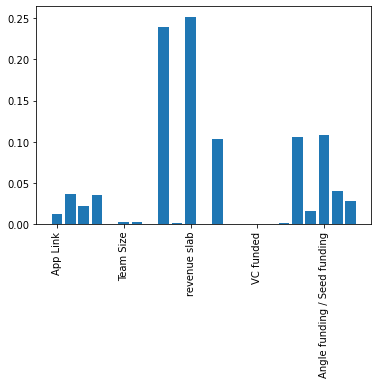

In [ ]:
from matplotlib import pyplot as plt
importance = Mod.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v), col_to_keep[i])
# plot feature importance
fig, ax = plt.subplots(1,1)
plt.bar([x for x in range(len(importance))], importance)
ax.set_xticklabels([str(i) for i in col_to_keep] , rotation='vertical')
plt.show()